<a href="https://colab.research.google.com/github/levchenkopavlo/AI/blob/master/%D0%94%D0%97_6_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[Опис даних](https://search.r-project.org/CRAN/refmans/PPtreeregViz/html/insurance.html)

In [121]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/insurance.csv")
df = df.select_dtypes('number')

In [122]:
df.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


# Завдання 1
Виведіть основні числові характеристики та кількість пропущених значень по стовпчиках

In [123]:
print('dimensions: ', df.shape, end='\n\n')
print(df.columns, end='\n\n')
print('types of columns:\n',df.dtypes, end='\n\n', sep='')
print('missing values:\n', df.isnull().sum(), end='\n\n', sep='')
df.describe()

dimensions:  (1338, 4)

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

types of columns:
age           int64
bmi         float64
children      int64
expenses    float64
dtype: object

missing values:
age         0
bmi         0
children    0
expenses    0
dtype: int64



,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


<Axes: xlabel='age', ylabel='bmi'>

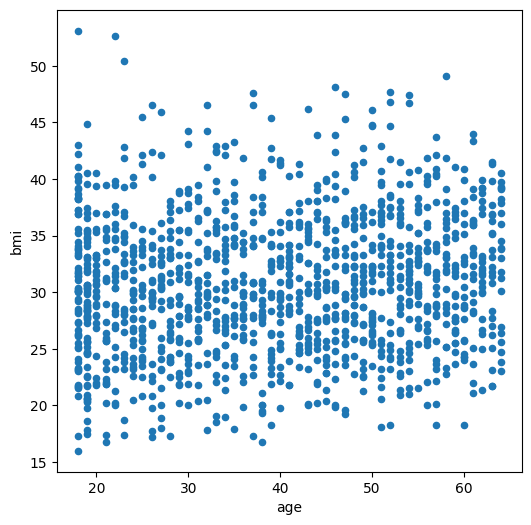

In [124]:
df.plot(kind='scatter', x='age', y='bmi', figsize=(6,6))

<Axes: xlabel='children', ylabel='bmi'>

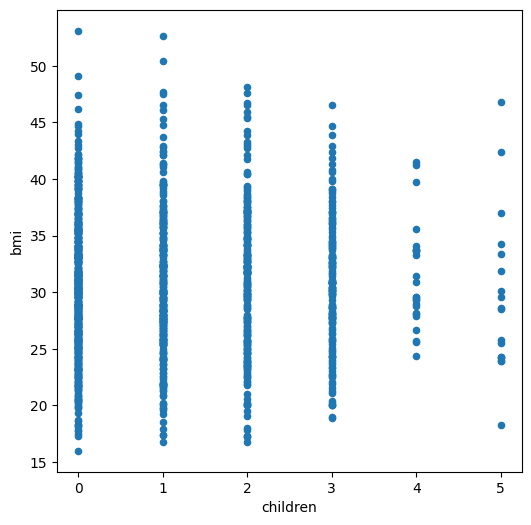

In [125]:
df.plot(kind='scatter', x='children', y='bmi', figsize=(6,6))

<Axes: xlabel='expenses', ylabel='bmi'>

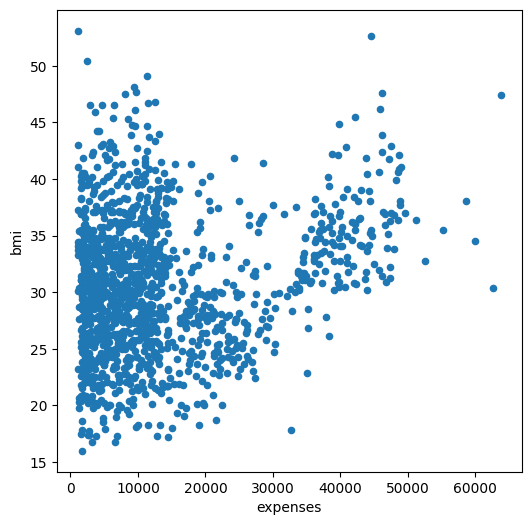

In [126]:
df.plot(kind='scatter', x='expenses', y='bmi', figsize=(6,6))

# Завдання 2
Розділіть дані на залежну y та незалежну X ознаки. Розділіть дані на тренувальну та тестову частини

In [127]:
y = df['bmi']
X = df.drop(columns='bmi')


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,  # частка даних для навчання
                                                    random_state=42) # зерно для генератора випадкових чисел

# Завдання 3
Натренуйте модель та виведіть такі метрики: MAE, RMSE, R2

In [128]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [129]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [130]:
y_pred = model.predict(X_test)

all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,4.73,4.90
MSE,34.89,38.58
RMSE,5.91,6.21
R2,0.04,0.03


In [131]:
corr = df.select_dtypes(include='number').corr(method='pearson')

corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


# Завдання 4
Напишіть рівняння регресії за прикладом:
Ціна = 1.02*Температура - 15.6

In [132]:
model.coef_

array([ 2.96565097e-02, -1.11226566e-01,  9.03429950e-05])

In [133]:
model.intercept_

28.312413098325226

In [134]:
# BMI = 2.96565097e-02 * age + 28.31

# BMI = -1.11226566e-01 * children + 28.31

# BMI = 9.03429950e-05 * expenses + 28.31

# Завдання 5 (оптимально)
Перевірте як видалення викидів вплине на результат

<Axes: >

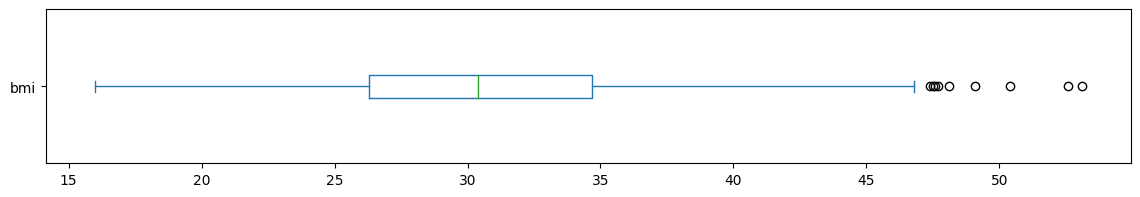

In [135]:
df['bmi'].plot(kind='box', vert=False, figsize=(14,2))

<Axes: >

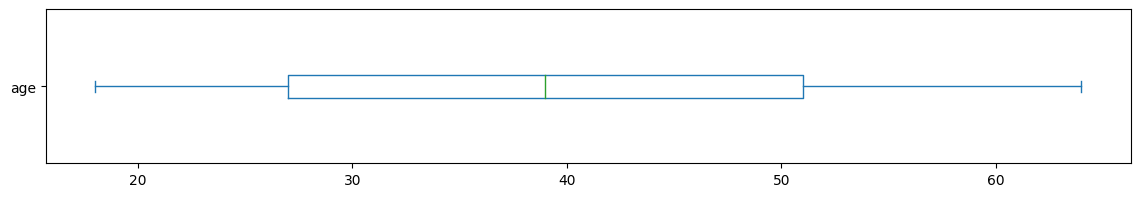

In [136]:
df['age'].plot(kind='box', vert=False, figsize=(14,2))

<Axes: >

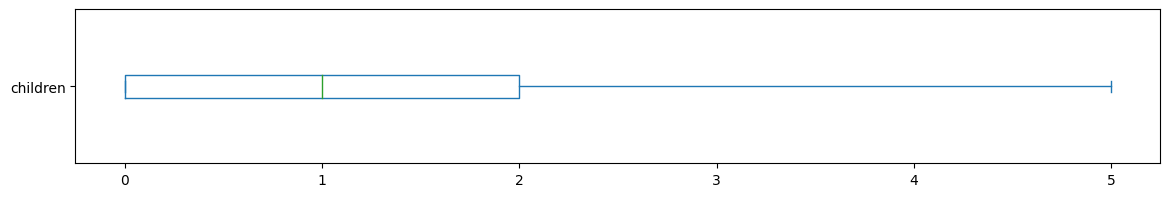

In [137]:
df['children'].plot(kind='box', vert=False, figsize=(14,2))

<Axes: >

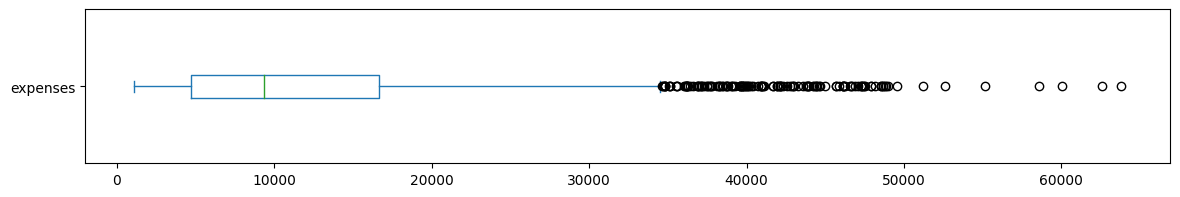

In [138]:
df['expenses'].plot(kind='box', vert=False, figsize=(14,2))

In [139]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]

In [140]:
print(df.shape)
df = remove_outliers(df, 'expenses')
print(df.shape)

(1338, 4)
(1199, 4)


In [141]:
y = df['bmi']
X = df.drop(columns='bmi')
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,  # частка даних для навчання
                                                    random_state=42) # зерно для генератора випадкових чисел

model.fit(X_train, y_train)

all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,4.83,4.26
MSE,36.22,29.86
RMSE,6.02,5.46
R2,0.03,0.05


In [142]:
corr = df.select_dtypes(include='number').corr(method='pearson')

corr

,age,bmi,children,expenses
age,1.000000,0.119531,0.040215,0.437642
bmi,0.119531,1.000000,0.002556,-0.066599
children,0.040215,0.002556,1.000000,0.083713
expenses,0.437642,-0.066599,0.083713,1.000000
